# PROJECT CONTENTS
- Problem Statement
- Step 1: ATTRIBUTES OF VARIABLES
- Step 2: IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Data Descriptive Analysis
 - 2.4:Data Combination Analysis
- Step 3: EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
 - 3.1:Count Distribution of Categorical Data - Univariate Analysis
- Step 4: DATA PREPROCESSING
- Step 5: STEMMING
- Step 6: VECTORIZATION
- Step 7: MODEL EVALUATION

# PROBLEM STATEMENT(FAKE NEWS PROJECT)


Description

FAKE NEWS PREDICTION 

- Context

Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

- Content

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
What is a Fake News?
Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.


- Workflow

In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

- Natural Language Processing

Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing.
In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.

- Dataset

You can find many datasets for fake news detection on Kaggle or many other sites. I download these datasets from Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We are combined both datasets using pandas built-in function.


# Step 1 - ATTRIBUTES OF VARIABLES

Lets understand the meaning and characteristics of our variables

1. Title: This refers to caption or news heading

2. Text: This refers to the type of text

3. Subject: This refers to the subject area of the news

4. Date: This refers to the date of the news


# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# 2.1 - IMPORT ALL NECESSARY LIBRARIES

Lets first import packages for regex,stemming,splitting data,vectorizing,removing stop words,models AND METRICS

In [1]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2.2 - LOAD DATA SET

# Fake News

In [2]:
df1 = pd.read_csv(r"C:\Users\USER\Documents\Fliprobo Technologies\Fake News\Fake.csv")
df1

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
#checking the first five rows
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#checking the last five rows
df1.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
#picking 4 random samples
df1.sample(4)

,title,text,subject,date
7504,Obama’s DOJ Just Got Serious About Institutio...,One of the positive effects of the racial tens...,News,"March 14, 2016"
7380,Governor Rick Scott Dumps Hospital Standards ...,Governor Rick Scott of Florida may be the wors...,News,"March 21, 2016"
5750,Sarah Palin’s #Brexit Response Is As Absolute...,The world is reeling today as Britain just mad...,News,"June 24, 2016"
22989,Boiler Room #97 – Mermaids and Swamp Life,Tune in to the Alternate Current Radio Network...,Middle-east,"February 17, 2017"


# True News

In [6]:
df2 = pd.read_csv(r"C:\Users\USER\Documents\Fliprobo Technologies\Fake News\True.csv")
df2

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
#checking the first five rows
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
#checking the last five rows
df2.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [9]:
#picking 4 random samples
df2.sample(4)

,title,text,subject,date
3523,Major U.S. tech firms press Congress for inter...,"WASHINGTON (Reuters) - Facebook (FB.O), Amazon...",politicsNews,"May 26, 2017"
153,U.S. bill to allow property and income or sale...,WASHINGTON (Reuters) - The chairman of the U.S...,politicsNews,"December 14, 2017"
10616,"Republicans Rubio, Cruz release taxes, piling ...",WASHINGTON (Reuters) - Republican presidential...,politicsNews,"February 27, 2016"
8581,Exclusive: Clinton campaign also hacked in att...,WASHINGTON/SAN FRANCISCO (Reuters) - A compute...,politicsNews,"July 29, 2016"


# 2.3 - DATA DESCRIPTIVE ANALYSIS

# Fake News

In [10]:
#checking the data shape/number of records
df1.shape

(23481, 4)

In [11]:
#checking for nature of datatypes
df1.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [12]:
#Checking data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [13]:
#Checking data full description
df1.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [14]:
# let us label the data 
df1['label'] = 0

In [15]:
#lets re-load the data
df1

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# True News

In [16]:
#checking the data shape/number of records
df2.shape

(21417, 4)

In [17]:
#checking for nature of datatypes
df2.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [18]:
#Checking data info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [19]:
#Checking data full description
df2.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [20]:
# let us label the data 
df2['label'] = 1

In [21]:
#lets re-load the data
df2

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# 2.4 - DATA COMBINATION AND ANALYSIS

In [22]:
#lets combine both data frames using pandas concat function
df = pd.concat([df1,df2])
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [23]:
#lets check the first five rows of the entire data
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [24]:
#lets check the no of records of the entire data
df.shape

(44898, 5)

In [25]:
#checking for nature of datatypes
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [26]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# STEP 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION

In [27]:
# lets count the label
df['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

From the above we can see its a balanced dataset and no need for SMOTE!

# 3.1 Count Distribution of Categorical Data - Univariate Analysis

(array([23481.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

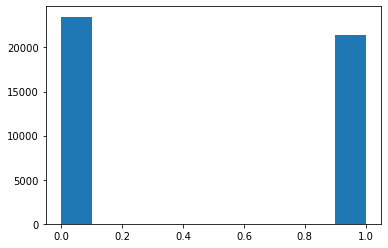

In [28]:
plt.hist(df['label'])

In [29]:
# lets check for null values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [30]:
# lets drop null values
df = df.dropna()

In [31]:
messages = df.copy()

In [32]:
messages.reset_index(inplace=True)

In [33]:
messages['title'][6]

' Fresh Off The Golf Course, Trump Lashes Out At FBI Deputy Director And James Comey'

In [34]:
#LETS IMPORT NLTK LIBRARY FOR NLP
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# printing stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Step 4 - DATA PRE-PROCESSING

In [36]:
#lets load our data
news_dataset = df
news_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [37]:
#lets check for number of records
news_dataset.shape

(44898, 5)

In [38]:
#lets print the first 5 rows
news_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [39]:
# lets check for missing values in the dataset
news_dataset.isnull().sum()
# As we can see below there are no missing values 

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [40]:
#lets combine the news column and the title column

news_dataset['content'] = news_dataset['title'] + '' + news_dataset['subject']

In [41]:
news_dataset['content']

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorit...
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object

In [42]:
#lets seperate the data and the labels

X = news_dataset.drop(columns='label',axis=1)  
Y = news_dataset['label']

In [43]:
print(X)
print(Y)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

# Step 5 - STEMMING

This returns words to it original root word

In [44]:
#lets initialise stemmer
port_stem = PorterStemmer()

In [45]:
#lets write a function for regex,stemming,
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [46]:
#lets apply the stemmer function to our data
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [47]:
#seperating  data and label

X = news_dataset['content'].values
Y = news_dataset['label'].values

In [48]:
print(X)
print(Y)

['donald trump send embarrass new year eve messag disturbingnew'
 'drunk brag trump staffer start russian collus investigationnew'
 'sheriff david clark becom internet joke threaten poke peopl eye news'
 ... 'minsk cultur hub becom authoritiesworldnew'
 'vatican upbeat possibl pope franci visit russiaworldnew'
 'indonesia buy billion worth russian jetsworldnew']
[0 0 0 ... 1 1 1]


Y.shape

In [49]:
X.shape

(44898,)

# Step 6 - VECTORIZATION

In [50]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

TfidfVectorizer()

In [51]:
X = vectorizer.transform(X)

In [52]:
print(X)

  (0, 23665)	0.26611621122181484
  (0, 21805)	0.10978940260829838
  (0, 18801)	0.3235631076380261
  (0, 14100)	0.21379993547365922
  (0, 13164)	0.32109162530760693
  (0, 7188)	0.42813121922791175
  (0, 6820)	0.3327029625539497
  (0, 6292)	0.24721341752600148
  (0, 6170)	0.5554485073790575
  (1, 21805)	0.11090506118080047
  (1, 20005)	0.3164702912834272
  (1, 19934)	0.3830493743674425
  (1, 18195)	0.26186769618690947
  (1, 10814)	0.45520691421260523
  (1, 6492)	0.4249242024516568
  (1, 4160)	0.3862329346864555
  (1, 2578)	0.3678251163491782
  (2, 21257)	0.2495685486235045
  (2, 19030)	0.30777262321697296
  (2, 15887)	0.4205991199659669
  (2, 15450)	0.23462941602286552
  (2, 14109)	0.10332654214980984
  (2, 11201)	0.3206093234059788
  (2, 10754)	0.2937929735545837
  (2, 7439)	0.288983714289855
  :	:
  (44893, 385)	0.46500674539717685
  (44894, 23428)	0.46801434897434585
  (44894, 22001)	0.2601801569545833
  (44894, 16369)	0.38059486724246583
  (44894, 12785)	0.45242709783198576
  (44894,

In [53]:
# lets split our data into training and test data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [54]:
#lets initialise our model
model = LogisticRegression()

In [55]:
#lets train our model
model.fit(X_train,Y_train)

LogisticRegression()

# STEP 7 - MODEL EVALUATION

In [56]:
y_pred_train = model.predict(X_train)

In [57]:
training_accuracy = accuracy_score(y_pred_train,Y_train)

In [58]:
print('The accuracy score of the training data is: ',training_accuracy)

The accuracy score of the training data is:  0.9769196503146055


In [59]:
y_pred_test = model.predict(X_test)

In [60]:
testing_accuracy = accuracy_score(y_pred_test,Y_test)

In [61]:
print('The accuracy score of the testing data is: ',testing_accuracy)

The accuracy score of the testing data is:  0.961804008908686


In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
confusion_matrix(y_pred_test,Y_test)

array([[4454,  101],
       [ 242, 4183]], dtype=int64)

In [64]:
print(classification_report(y_pred_test,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4555
           1       0.98      0.95      0.96      4425

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [65]:
print(Y_test)

[1 1 0 ... 0 0 0]


In [66]:
# Lets make a prediction

X_new = X_test[2]
prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print('The news is fake')
    
else:
    print('The news is real')

[0]
The news is fake


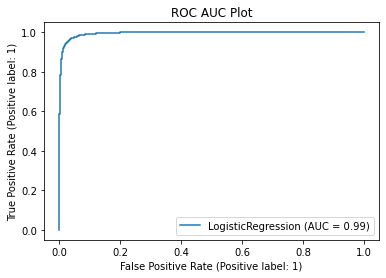

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)
plt.title("ROC AUC Plot")
plt.show()